## Introduction:
We note that the nation term is a very typical 'transport hub', we analyse this in relation to national GDP data

In [ ]:
%run Hubs.ipynb

In [2]:
categories_df = pd.read_csv(links_paths_path + 'categories.tsv', sep='\t',\
                                  names = ['article', 'category'],  skiprows=13)

In [3]:
countries = categories_df[categories_df['category'] == 'subject.Countries'].reset_index()
countries

,index,article,category
0,2,%C3%85land,subject.Countries
1,5,%C3%89ire,subject.Countries
2,102,Abkhazia,subject.Countries
3,109,Abu_Dhabi,subject.Countries
4,141,Afghanistan,subject.Countries
...,...,...,...
224,5022,West_Bank,subject.Countries
225,5031,Western_Sahara,subject.Countries
226,5159,Yemen,subject.Countries
227,5182,Zambia,subject.Countries


In [4]:
categories_df = categories_df[~(categories_df['category'] == 'subject.Countries')].reset_index(drop=True)
categories_df

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Geography.European_Geography.European_...
3,%C3%89douard_Manet,subject.People.Artists
4,%C3%89ire,subject.Geography.European_Geography.European_...
...,...,...
4970,Zirconium,subject.Science.Chemistry.Chemical_elements
4971,Zoroaster,subject.People.Religious_figures_and_leaders
4972,Zuid-Gelders,subject.Geography.European_Geography
4973,Zuid-Gelders,subject.Language_and_literature.Languages


In [5]:
# Take the penultimate category of the hierarchy
temp_df = categories_df['category'].copy()
categories_df['category'] = temp_df.apply(lambda x: x.split("."))
temp_df = categories_df['category'].copy()
categories_df['category'] = temp_df.apply(lambda x: x[-2])
categories_df['category'].unique()

array(['British_History', 'People', 'European_Geography',
       'Business_Studies', 'History', 'Physics', 'Everyday_life',
       'Geography', 'Design_and_Technology', 'Biology', 'Music', 'IT',
       'Language_and_literature', 'subject', 'Religion',
       'Geography_of_Asia', 'Art', 'Geography_of_the_Middle_East',
       'Chemistry', 'Citizenship', 'African_Geography',
       'Central_and_South_American_Geography'], dtype=object)

In [6]:
# Fix the hierarchy so that all levels are at the same semantic level
categories_df['category'][categories_df['category'] == 'British_History'] = 'History'
geo = ['African_Geography','Geography_of_Asia','Geography_of_the_Middle_East','Central_and_South_American_Geography','European_Geography']
categories_df['category'][categories_df['category'].isin(geo)] = 'Geography'
categories_df['category'].unique()   

array(['History', 'People', 'Geography', 'Business_Studies', 'Physics',
       'Everyday_life', 'Design_and_Technology', 'Biology', 'Music', 'IT',
       'Language_and_literature', 'subject', 'Religion', 'Art',
       'Chemistry', 'Citizenship'], dtype=object)

In [7]:
# Drop duplicates
categories_df = categories_df.drop_duplicates().reset_index(drop=True)
categories_df

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,History
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People
2,%C3%85land,Geography
3,%C3%89douard_Manet,People
4,%C3%89ire,Geography
...,...,...
4877,Zirconium,Chemistry
4878,Zoroaster,People
4879,Zuid-Gelders,Geography
4880,Zuid-Gelders,Language_and_literature


In [8]:
#Read the GDP database
GDP_df = pd.read_csv('gdp.csv')
GDP_df = GDP_df.dropna()
GDP_df.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,17805113118.8938,19907317065.6666,20146404996.223,20497126770.1335,19134211763.859,18116562464.9088,18753469630.2586,18053228578.8878,18799450742.7823,20116137325.8206,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2028553750,3480355258.04122,12890764531.3284,12319830437.3467,12776220507.0162,13228147516.1168,11386850129.8411,11861199830.8396,13019689336.6919,15156432309.8977,15401830754.0773,15131866270.5936,18260043499.8068
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,62048562947.2509,54790392746.1939,200013052199.2,209058991952.125,209755003250.664,213810024944.464,165979279263.174,160034163871.455,170097014589.134,174910878623.049,171767403748.19,145009181490.62,167983141738.311
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,570000000,640000000,638000000,643000000,673000000,671000000,612000000,639000000,648000000,709000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,1029048481.88051,1429049198.45218,3629133574.27783,3188652765.36184,3193512950.02419,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3329910723.76078


In [9]:
# Only data of 2012,2013,2014 are retained
GDP_df = GDP_df.iloc[:,[2,6,7,8]]
GDP_df.rename(columns={'2011 [YR2011]': '2011','2012 [YR2012]': '2012', '2013 [YR2013]': '2013' }, inplace=True)

# Harmonisation of the expression of the name of the country
GDP_df = GDP_df.replace('Russian Federation','Russia')
GDP_df = GDP_df.replace('Egypt, Arab Rep.','Egypt')
GDP_df = GDP_df.replace('Turkiye','Turkey')
GDP_df = GDP_df.replace('People%27s_Republic_of_China','China')
GDP_df

,Country Name,2011,2012,2013
0,Afghanistan,17805113118.8938,19907317065.6666,20146404996.223
1,Albania,12890764531.3284,12319830437.3467,12776220507.0162
2,Algeria,200013052199.2,209058991952.125,209755003250.664
3,American Samoa,570000000,640000000,638000000
4,Andorra,3629133574.27783,3188652765.36184,3193512950.02419
...,...,...,...,...
261,Sub-Saharan Africa,1635062171988.2,1700400038004.9,1804729746760.4
262,Sub-Saharan Africa (excluding high income),1633996697500.65,1699341029335.21,1803401657074.03
263,Sub-Saharan Africa (IDA & IBRD countries),1635062171988.19,1700400038004.9,1804729746760.4
264,Upper middle income,17647374231249.2,18914948953514.4,20306810324023.2


In [10]:
# Integration of country names, hotness and GDP into one dict
countries_dict_2011 = {}
countries_list_2011 = countries['article'].tolist()
for idx,item in enumerate(TOP100_2011):
    if item[0] in countries_list_2011:
        gdp = float(GDP_df['2011'][GDP_df['Country Name'] == item[0].replace('_', ' ')].max())
        countries_dict_2011[item[0]] = [item[1],gdp]
countries_dict_2011

{'United_States': [2151, 15599728123000.0],
 'United_Kingdom': [913, 2674891473843.81],
 'France': [436, 2865157541994.17],
 'India': [359, 1823049927771.46],
 'Germany': [352, 3749314991050.59],
 'Mexico': [329, 1180489601957.61],
 'China': [227, 7551500124197.17],
 'Japan': [217, 6233147172341.35],
 'Russia': [211, 2045925608274.37],
 'Canada': [206, 1793326630174.52],
 'Australia': [203, 1397907916789.9],
 'Norway': [195, 498283438454.281],
 'Italy': [194, 2294994296589.5],
 'Egypt': [174, 235989672977.625],
 'South_Africa': [157, 458201514136.977],
 'Brazil': [144, 2616156606666.62],
 'Iceland': [135, 15221622925.9319],
 'Spain': [134, 1480710495710.12],
 'Netherlands': [126, 905270626332.687]}

In [11]:
countries_dict_2012 = {}
countries_list_2012 = countries['article'].tolist()
for idx,item in enumerate(TOP100_2012):
    if item[0] in countries_list_2012:
        gdp = float(GDP_df['2012'][GDP_df['Country Name'] == item[0].replace('_', ' ')].max())
        countries_dict_2012[item[0]] = [item[1],gdp]
countries_dict_2012

{'United_States': [2665, 16253972230000.0],
 'United_Kingdom': [1130, 2719158341005.79],
 'Germany': [532, 3527143188785.16],
 'France': [461, 2683671716967.19],
 'India': [364, 1827637859135.7],
 'China': [338, 8532229986993.65],
 'Russia': [294, 2208295773643.15],
 'Mexico': [287, 1201089987015.45],
 'Canada': [272, 1828366481521.6],
 'Italy': [258, 2086957656821.6],
 'Japan': [254, 6272362996105.03],
 'Australia': [237, 1546508558465.66],
 'Norway': [202, 509506317146.541],
 'Brazil': [199, 2465228293894.01],
 'Egypt': [197, 279116666666.667],
 'People%27s_Republic_of_China': [194, nan],
 'South_Africa': [179, 434400545085.811]}

In [19]:
TOP100_2012

[('United_States', 2665),
 ('Europe', 1275),
 ('United_Kingdom', 1130),
 ('Earth', 987),
 ('England', 977),
 ('Batman', 842),
 ('Africa', 793),
 ('World_War_II', 732),
 ('Brain', 698),
 ('Human', 673),
 ('Computer', 637),
 ('Mammal', 604),
 ('Animal', 579),
 ('North_America', 556),
 ('Asteroid', 542),
 ('Bird', 535),
 ('Germany', 532),
 ('Theatre', 527),
 ('Pyramid', 482),
 ('France', 461),
 ('English_language', 455),
 ('Agriculture', 442),
 ('Plant', 438),
 ('Scotland', 434),
 ('Science', 419),
 ('Internet', 410),
 ('Christianity', 407),
 ('Telephone', 399),
 ('Adolf_Hitler', 394),
 ('Atlantic_Ocean', 375),
 ('India', 364),
 ('Viking', 357),
 ('Computer_science', 351),
 ('Sun', 343),
 ('Chemistry', 339),
 ('China', 338),
 ('Fish', 315),
 ('Cat', 310),
 ('Asia', 303),
 ('Russia', 294),
 ('Mexico', 287),
 ('Zebra', 282),
 ('California', 278),
 ('London', 276),
 ('Biology', 272),
 ('Canada', 272),
 ('Great_Britain', 270),
 ('Water', 264),
 ('Italy', 258),
 ('Technology', 255),
 ('Japan',

In [12]:
countries_dict_2013 = {}
countries_list_2013 = countries['article'].tolist()
for idx,item in enumerate(TOP100_2013):
    if item[0] in countries_list_2013:
        gdp = float(GDP_df['2013'][GDP_df['Country Name'] == item[0].replace('_', ' ')].max())
        countries_dict_2013[item[0]] = [item[1],gdp]
countries_dict_2013

{'United_States': [2708, 16843190993000.0],
 'United_Kingdom': [1089, 2803291406029.93],
 'France': [465, 2811876903329.03],
 'India': [440, 1856722121394.53],
 'Germany': [439, 3733804649549.03],
 'Mexico': [288, 1274443084716.57],
 'Japan': [276, 5212328181166.18],
 'Italy': [272, 2141924094298.56],
 'Australia': [267, 1576335282651.07],
 'Russia': [260, 2292473246621.08],
 'China': [230, 9570406235659.64],
 'Canada': [214, 1846597421834.98],
 'Norway': [189, 522761531914.894],
 'Egypt': [179, 288434108527.132],
 'South_Africa': [177, 400886013595.573],
 'Spain': [155, 1355142585077.65]}

In [22]:
countries_dict_2012['China'][0] = countries_dict_2012['China'][0] + countries_dict_2012['People%27s_Republic_of_China'][0]
del countries_dict_2012['People%27s_Republic_of_China']

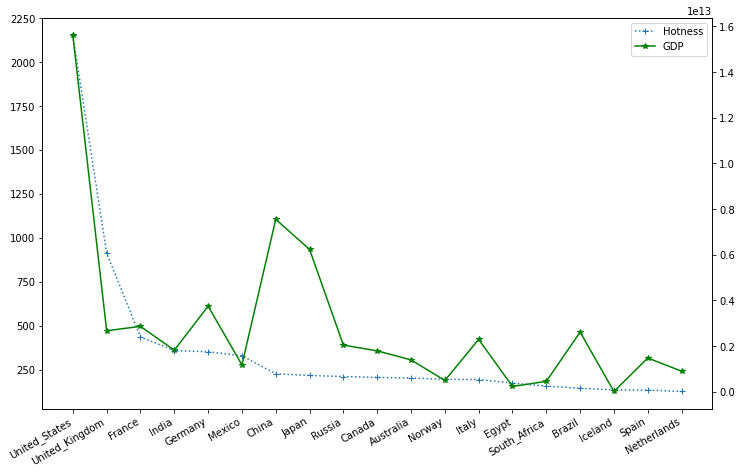

<Figure size 864x576 with 0 Axes>

In [26]:
from matplotlib import pyplot as plt

country = np.array([])
hot = np.array([])
gdp_array = np.array([])
for key,value in countries_dict_2011.items():
    country = np.append(country, key)
    hot = np.append(hot,value[0])
    gdp_array = np.append(gdp_array,value[1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(country, hot, linestyle=':', label = 'Hotness',marker='+')

ax2 = ax.twinx()
ax2.plot(country, gdp_array, color = 'green', label = 'GDP', marker='*')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.autofmt_xdate()

plt.show()
plt.savefig("GDP_2011.png")

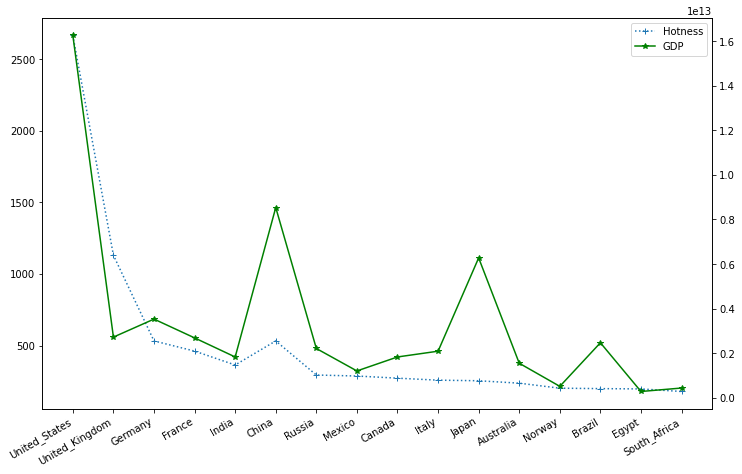

<Figure size 864x576 with 0 Axes>

In [27]:
country = np.array([])
hot = np.array([])
gdp_array = np.array([])
for key,value in countries_dict_2012.items():
    country = np.append(country, key)
    hot = np.append(hot,value[0])
    gdp_array = np.append(gdp_array,value[1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(country, hot, linestyle=':', label = 'Hotness',marker='+')

ax2 = ax.twinx()
ax2.plot(country, gdp_array, color = 'green', label = 'GDP', marker='*')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.autofmt_xdate()

plt.show()
plt.savefig("GDP_2012.png")

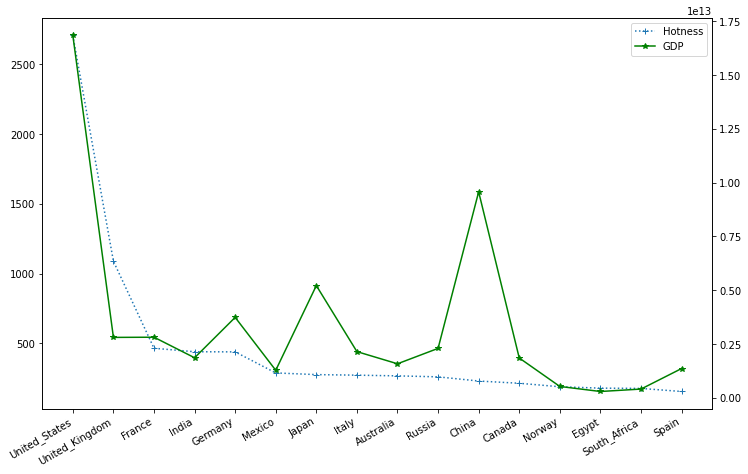

<Figure size 864x576 with 0 Axes>

In [28]:
country = np.array([])
hot = np.array([])
gdp_array = np.array([])
for key,value in countries_dict_2013.items():
    country = np.append(country, key)
    hot = np.append(hot,value[0])
    gdp_array = np.append(gdp_array,value[1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(country, hot, linestyle=':', label = 'Hotness',marker='+')

ax2 = ax.twinx()
ax2.plot(country, gdp_array, color = 'green', label = 'GDP', marker='*')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.autofmt_xdate()

plt.show()
plt.savefig("GDP_2013.png")

We can see that the country's GDP has a tendency to homogenise with its hotness in the game, for further research, we can also explore the relationship of hotness and other national statistics (such as population, people's literacy level).